# NLP - HTTP

## shift + tap 하면 code 도움말 나옴

In [1]:
# !pip install builtwith

  Stored in directory: /Users/charming/Library/Caches/pip/wheels/2b/00/c2/a96241e7fe520e75093898bf926764a924873e0304f10b2524
Successfully built builtwith
You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
from builtwith import builtwith
builtwith('http://www.tistory.com')

# 웹페이지가 어떤 기술로 만들어졌는지를 확인할 수 있다.
# 그냥 Url만 입력하면 됨
# 상대방에 대한 정보를 취득하는 용도

{'javascript-frameworks': ['Underscore.js', 'jQuery'],
 'web-servers': ['Apache']}

In [11]:
# !pip install python-whois

    100% |████████████████████████████████| 92kB 130kB/s ta 0:00:01
    100% |████████████████████████████████| 829kB 525kB/s ta 0:00:01
  Stored in directory: /Users/charming/Library/Caches/pip/wheels/09/69/68/dc484fdb90e36236630beafa07b21644b4280ce3ebd5f8b4b9
  Stored in directory: /Users/charming/Library/Caches/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built python-whois future
You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
from whois import whois
whois('http://www.tistory.com')

# 소유권자에 대한 정보를 얻을 수 있다. 


{'address': '242, Jeju-si Cheomdan-ro, Jeju-do, KR',
 'city': 'Jeju-do',
 'country': 'KR',
 'creation_date': datetime.datetime(2005, 10, 1, 16, 49, 5),
 'dnssec': 'unsigned',
 'domain_name': ['TISTORY.COM', 'tistory.com'],
 'emails': ['reportabuse@ibi.net', 'domain@kakaocorp.com'],
 'expiration_date': datetime.datetime(2019, 10, 1, 16, 49, 5),
 'name': 'Kakao Corp.',
 'name_servers': ['NS1.DAUM.NET',
  'NS2.DAUM.NET',
  'ns1.daum.net',
  'ns2.daum.net'],
 'org': 'Kakao Corp.',
 'referral_url': None,
 'registrar': 'Netpia.com, Inc.',
 'state': None,
 'status': 'ok https://icann.org/epp#ok',
 'updated_date': [datetime.datetime(2018, 9, 28, 4, 44, 11),
  datetime.datetime(2018, 9, 28, 13, 44, 1)],
 'whois_server': 'whois.ibi.net',
 'zipcode': '63309'}

In [5]:
# python 3 있으면 자동으로 있는 package

from urllib import request, robotparser

In [6]:
# robots.txt를 보고 내가 사용할 수 있는지 아닌지 봄
robot = robotparser.RobotFileParser()

In [7]:
robot.set_url('https://www.google.com/robots.txt')

In [8]:
robot.read()

In [9]:
robot.can_fetch("Agent","http://www.google.com")
# / 를 긁을 수 있는지 -> T / F


False

# Urllib

In [26]:
from urllib import request
from urllib import error

headers = {'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36'}
url = 'https://www.google.com/search?q=%ED%8C%8C%EC%9D%B4%EC%8D%AC'

def download(url,retries=3):     # 에러가 났을 때, 3번 정도 더 시도해 보는 것.
    resp = None
    req = request.Request(url,headers=headers)
   
    try:
        resp = request.urlopen(req)
    except error.HTTPError as e:
        if 500 <= e.code < 600 and retries > 0:    # 500대 에러이면 한 번 더 시도하는 것
            return download(url,retries-1)    # 여기서는 딱 3번 돔 (재귀적으로)
        else:
            print(e.code)
            print(e.reason)
            print(e.headers)
            
    return resp

html = download(url)
#html.read().decode('utf-8')

## 파이썬 검색해서 하면 안뜸 searchMozilla/5.0 (Macintosh; Intel Mac OS X 10_14_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36가 disallowed 이기 때문에 ( forbidden )
## 파라미터는 항상 바이트 타입으로 보내야함. 
## 한글로 그대로 대신 적어주면 에러 뜸 

### header 추가하면 403 에러 뜨지 않음  
### 에러 400 : 내 잘못 / 500 : 서버 잘못, 다시 시도해봐야함 

In [27]:
type(html)

http.client.HTTPResponse

In [28]:
# 잘 받았는지 확인
html.geturl()

'https://www.google.com/search?q=%ED%8C%8C%EC%9D%B4%EC%8D%AC'

In [29]:
html.code  # 200 이면 잘 받은 것

200

In [30]:
html.getheaders()

[('Content-Type', 'text/html; charset=UTF-8'),
 ('Date', 'Wed, 06 Mar 2019 05:02:41 GMT'),
 ('Expires', '-1'),
 ('Cache-Control', 'private, max-age=0'),
 ('Strict-Transport-Security', 'max-age=31536000'),
 ('P3P', 'CP="This is not a P3P policy! See g.co/p3phelp for more info."'),
 ('Server', 'gws'),
 ('X-XSS-Protection', '1; mode=block'),
 ('X-Frame-Options', 'SAMEORIGIN'),
 ('Set-Cookie',
  '1P_JAR=2019-03-06-05; expires=Fri, 05-Apr-2019 05:02:41 GMT; path=/; domain=.google.com'),
 ('Set-Cookie',
  'CGIC=; expires=Wed, 04-Sep-2019 19:57:17 GMT; path=/complete/search; domain=.google.com; HttpOnly'),
 ('Set-Cookie',
  'CGIC=; expires=Wed, 04-Sep-2019 19:57:17 GMT; path=/search; domain=.google.com; HttpOnly'),
 ('Set-Cookie',
  'NID=162=qsdjf0NdOt8o3hKInKlpP8bQqGBAreV5LetsV95QsbzfvvWcFtGig8-eG-2kdcquzvJwJUlE9tuvaGDll48GCGg7piyZavdo88-AQGUGhWSuk2NHck7Pt3Sr_T8UrN2BdB2WLp6QnkxsiJmY22psL8rp2C-nUV-N2eDT49KHnfY; expires=Thu, 05-Sep-2019 05:02:41 GMT; path=/; domain=.google.com; HttpOnly'),
 ('

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>파이썬 - Google 검색</title><script nonce="g/mmbSD3gmuG8+X9jAB+lg==">(function(){window.google={kEI:\'cVR_XJjJA5iD-QadyJHQCQ\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_cVR_XJjJA5iD-QadyJHQCQ\',kGL:\'KR\'};google.kHL=\'ko\';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b};google.https=function(){return"https:"==window.location.protocol};google.ml=function(){return null};google.time=function(){return(new Date).getTime()};google.log=function(a,b,e,c,g){if(a=google.logUrl(a,b,e,c,g)){b=new Image;var d=google.lc,f=google.li;d[f]=b;b.on
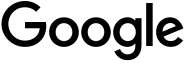
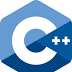

In [31]:
# 데이터 부분을 읽어옴 ( b = byte임. utf-8로 바꾸면 ' 가 나옴' 이제 문자열이 된 것 )

html.read().decode('utf-8')

# Parse

In [32]:
# URL parsing
# url의 string을 다 잘라내서 여러 개의 요소로 나누는 것

from urllib import parse

parse.urlparse(url) # 6개로 쪼갬 
# 분해하고 합칠 줄 알아야함!!

ParseResult(scheme='https', netloc='www.google.com', path='/search', params='', query='q=%ED%8C%8C%EC%9D%B4%EC%8D%AC', fragment='')

In [33]:
# 합치기

parse.urljoin(url,'/search/about')     # 상대주소를 가지고 절대주소를 만드는 것

'https://www.google.com/search/about'

In [34]:
# 글자를 단지 바꿔주는 것
# parse.quote() : 헥사바이트로 바꿔주는 것
parse.quote_plus('파이썬')   # 띄어쓰기를 +로 표시함
parse.unquote_plus('%ED%8C%8C%EC%9D%B4%EC%8D%AC')
# 역으로 해석하는 것 ( 헥사바이트 -> 문자 )


'파이썬'

In [35]:
# 파라미터는 항상 ? 뒤에 옴  그리고 한 쌍으로 이루어짐
# dict or tuple의 쌍이 들어오면 url의 query 형태의 파라미터로 바꿔준다
parse.urlencode({'q':'파이썬'})  
# 딕셔너리에 우리가 필요한 파라미터를 넣으면 알아서 생성해줌

'q=%ED%8C%8C%EC%9D%B4%EC%8D%AC'

In [36]:
# 서비스 토큰 API같은 것을 넣으려고 하면 unquote로 풀고 다시 quote로 
# 해야한다. 아니면 기존의 헥사코드를 또 헥사코드로 만든다. ( 자기자신이 되도록 만들어주는 과정 )

# Request

In [37]:
import requests 
# 더 capsulize된 라이브러리.
# 더 편함

In [38]:
url = 'http://www.google.com/search'
resp = requests.get(url,params={'q':'파이썬'},headers=headers)
# urlencode 과정이 자동으로 된 것, 한글 사용해도 무방함


In [39]:
resp.raise_for_status()
# HTTPError 발생 시 안에있는 정보를 다 내보냄

resp.status_code   # 이 에러가 500대 인지 아닌지가 중요한 것. 
resp.reason
resp.headers
resp.request.headers

{'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': 'CGIC=IgMqLyo; 1P_JAR=2019-03-06-05; NID=162=YtEOyKvGnt4-z2w3dTIxaiyDc-8ob1Mwrc_8CArHTr7i5INFt2jTnjZS1QiPKFj_B3xol43PxfASyCx3zFl40LQnfrB40QDvx-M8bmwfQEhWN0HYx6FZyYGfSuIBag_NcnGstSR3TVDbbXtQKFxlEsSh1LFV4m9nzIo-kLnlWxY'}

In [40]:
type(resp.text)
resp.encoding= 'utf-8'
resp.encoding

'utf-8'

In [41]:
resp.headers  # blocked 된 headers 임. 

{'Content-Type': 'text/html; charset=UTF-8', 'Date': 'Wed, 06 Mar 2019 05:02:59 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Strict-Transport-Security': 'max-age=31536000', 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '1; mode=block', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '1P_JAR=2019-03-06-05; expires=Fri, 05-Apr-2019 05:02:59 GMT; path=/; domain=.google.com, NID=162=J7aZnYYebQqzFH5OIEeMUwnkCGs9TyLPDfljp37TsEJ8XqcZ_jcAg5TdhV3PQ3osCrcj9pRMlosXaXt7oFd52osATpM0D5gU37WgFca9dIcop5BpU0B3x9sga00C63WfaXGSIYzHSNmO2hnmccvRX15VT8ZxDdVH4N9os4U-V5k; expires=Thu, 05-Sep-2019 05:02:59 GMT; path=/; domain=.google.com; HttpOnly', 'Alt-Svc': 'quic=":443"; ma=2592000; v="46,44,43,39"', 'Transfer-Encoding': 'chunked'}

In [42]:
resp.url 

'https://www.google.com/search?q=%ED%8C%8C%EC%9D%B4%EC%8D%AC&gws_rd=ssl'

In [43]:
resp.request.headers
# 실제 우리가 날린 header가 된다. 
# user-agent가 없어서 block 하는 것

{'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': 'CGIC=IgMqLyo; 1P_JAR=2019-03-06-05; NID=162=YtEOyKvGnt4-z2w3dTIxaiyDc-8ob1Mwrc_8CArHTr7i5INFt2jTnjZS1QiPKFj_B3xol43PxfASyCx3zFl40LQnfrB40QDvx-M8bmwfQEhWN0HYx6FZyYGfSuIBag_NcnGstSR3TVDbbXtQKFxlEsSh1LFV4m9nzIo-kLnlWxY'}

# 위 코드 간결하게

In [44]:
import requests

url = "https://www.google.com/search"
headers = {'user-agent' :'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36'}
# headers 에 mozila부분만 들어가도 가능함
# headers에 각자의 user-agent값을 key-value로 입력하면 된다.

def download(url, param=None,retries=3):     # 에러가 났을 때, 3번 정도 더 시도해 보는 것.
    resp = None
    
    try:
        resp = requests.get(url,params=param,headers=headers)
    except requests.exceptions.HTTPError as e:
        if 500 <= resp.status_code < 600 and retries > 0:    # 500대 에러이면 한 번 더 시도하는 것
            return download(url,retries-1)    # 여기서는 딱 3번 돔 (재귀적으로)
        else:
            print(resp.status_code)
            print(resp.reason)
            print(resp.headers)
            print(resp.request.headers)
            
    return resp

#html = download(url)
#html.read().decode('utf-8')

## 파이썬 검색해서 하면 안뜸 searchMozilla/5.0 (Macintosh; Intel Mac OS X 10_14_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36가 disallowed 이기 때문에 ( forbidden )
## 파라미터는 항상 바이트 타입으로 보내야함. 
## 한글로 그대로 대신 적어주면 에러 뜸 

### header 추가하면 403 에러 뜨지 않음  
### 에러 400 : 내 잘못 / 500 : 서버 잘못, 다시 시도해봐야함 

In [45]:
html = download(url,param={'q':'파이썬'})

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>파이썬 - Google 검색</title><script nonce="KKn0M8MXzTxoNwJX32+HNQ==">(function(){window.google={kEI:\'kVR_XOupLpfh-Ab8lIbICA\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_kVR_XOupLpfh-Ab8lIbICA\',kGL:\'KR\'};google.kHL=\'ko\';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b};google.https=function(){return"https:"==window.location.protocol};google.ml=function(){return null};google.time=function(){return(new Date).getTime()};google.log=function(a,b,e,c,g){if(a=google.logUrl(a,b,e,c,g)){b=new Image;var d=google.lc,f=google.li;d[f]=b;b.on
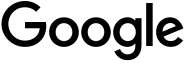
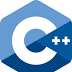

In [46]:
html.text